In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

data = pd.read_csv('data/listings.csv')

# Import of the right libraries

Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn


## Division of labor ##

We did this entire project together with pair programming.
We got together and devided smaller task and combined our findings in bigger cells regularly.
There are no single responsibilities.

In [63]:
data
# First visual look of the given data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


In [64]:
data_cleaned = data
# Some columns are shifted by an excessive comma. We shifted these columns by looking for errors in 'host_since'.
shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]

for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + ", " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]
# The column Neighbourhood_overview contains a comma that got wrongfully parsed, the second part of neighbourhood_overview got wrongfully
# placed in the next column
# The for-loop above fixes this problem

data_cleaned = pd.concat([data_cleaned, shifted])

# We drop the last column as it is a useless column created by the excessive comma.
data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

# Verification of datacleaning
data_cleaned

C:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


In [65]:
# We can't use host_since in our model-training because we need numerical values.
data_cleaned['host_since'] = np.datetime64('today') - pd.to_datetime(data_cleaned['host_since'])
data_cleaned['host_since'] = data_cleaned['host_since'].astype(str).str.replace(' days', '').astype(int)
data_cleaned['host_since'].dtype


dtype('int32')

In [66]:
#verification
data_cleaned['host_since'].dtype

dtype('int32')

In [67]:
# Because of the shift, the types of some values aren't right anymore

data_cleaned['longitude'] = data_cleaned['longitude'].astype(float)
data_cleaned['latitude'] = data_cleaned['latitude'].astype(float)


In [68]:
# Change boolean values t (true) and f (false) to 1 and 0
data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].replace('t', 1).replace('f', 0)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].replace('t', 1).replace('f', 0)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].replace('t', 1).replace('f', 0)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].replace('t', 1).replace('f', 0)


In [69]:
# The center of Ghent lies at 51.0544707, 3.7236719 (https://www.coordinatenbepalen.nl/coordinates/107915-gent-centrum)
# We calculate de distance of each listing to the center
from math import radians, cos, sin, asin, sqrt

ghent_lat = 51.0544707
ghent_long = 3.7236719


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in data_cleaned.iterrows():
    data_cleaned.loc[index, 'distance_to_center'] = haversine(ghent_long, ghent_lat, row['longitude'], row['latitude'])

df = data_cleaned.drop(["latitude", "longitude"], axis=1)


In [70]:
# NaN is set to 0 because there is no separate place to sleep, but we assume there is at least one place to sleep. 
# We investigated the data (see below) and discovered that it is always a studio, lounge or a condo.

data_cleaned['bedrooms'] = data_cleaned['bedrooms'].replace(np.NAN, 0).astype(int)
data_cleaned['beds'] = data_cleaned['beds'].replace(np.NAN, 0).astype(int)


In [71]:
# Changing the accomodates column to the right type
data_cleaned['accommodates'] = data_cleaned['accommodates'].astype(int)


In [72]:
# The data in 'room_type' is one of four possibilities: Entire home/apt, Private room, Shared room or Hotel. 
# This data isn't a numerical value so we can't use that to train our model, so what we could do is replace them with a number between 0 and 3.
# The problem with this is that the model might assume some kind of order or hierarchy. 
# One-hot encoding is a better solution to this problem.

a = pd.get_dummies(data_cleaned['room_type'], prefix="room_type")

frames = [data_cleaned, a]
data_cleaned = pd.concat(frames, axis=1)


data_cleaned.drop(['room_type'], inplace=True, axis=1)

data_cleaned.rename(
    columns={
        "room_type_Private room": "room_type_private", 
        "room_type_Entire home/apt": "room_type_entire", 
        "room_type_Hotel room": "room_type_hotel", 
        "room_type_Shared room": "room_type_shared"}, 
        inplace=True
    )


In [73]:
# Changing the price to the right type

data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\Lucas\AppData\Local\Temp/ipykernel_13448/3496205334.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


In [74]:
# The bathrooms_text contains a numerical value for the amount of bathrooms in the listing. In this cell that numeric value is extracted.
test=[]

for x in data_cleaned['bathrooms_text'].str.findall('\d[\.]*[\d]*'):
  if len(x)!=0:
    test.append(float(x[0]))
  else:
    test.append(float(0))

data_cleaned['bathrooms'] = test

data_cleaned.loc[:,['bathrooms','bathrooms_text']]


,bathrooms,bathrooms_text
0,1.5,1.5 baths
1,1.0,1 bath
2,1.0,1 bath
3,1.5,1.5 baths
4,2.5,2.5 baths
...,...,...
515,1.0,1 bath
516,1.0,1 bath
537,1.0,1 shared bath
841,1.0,1 private bath


In [75]:
# set columns to correct type
data_cleaned['host_listings_count'] = data_cleaned['host_listings_count'].astype(int)

data_cleaned['availability_30'] = data_cleaned['availability_30'].astype(int)
data_cleaned['availability_60'] = data_cleaned['availability_60'].astype(int)
data_cleaned['availability_90'] = data_cleaned['availability_90'].astype(int)
data_cleaned['availability_365'] = data_cleaned['availability_365'].astype(int)

data_cleaned['review_scores_rating'] = data_cleaned['review_scores_rating'].astype(float)
data_cleaned['number_of_reviews'] = data_cleaned['number_of_reviews'].astype(float)

data_cleaned['host_is_superhost'] = data_cleaned['host_is_superhost'].astype(int)
data_cleaned['host_has_profile_pic'] = data_cleaned['host_has_profile_pic'].astype(int)
data_cleaned['host_identity_verified'] = data_cleaned['host_identity_verified'].astype(int)
data_cleaned['number_of_reviews_ltm'] = data_cleaned['number_of_reviews_ltm'].astype(int)
data_cleaned['number_of_reviews_l30d'] = data_cleaned['number_of_reviews_l30d'].astype(int)
data_cleaned['instant_bookable'] = data_cleaned['instant_bookable'].astype(int)


C:\Users\Lucas\AppData\Local\Temp/ipykernel_13448/2714430481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withDescription['descr'] = 1
C:\Users\Lucas\AppData\Local\Temp/ipykernel_13448/2714430481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withoutDescription['descr'] = 0


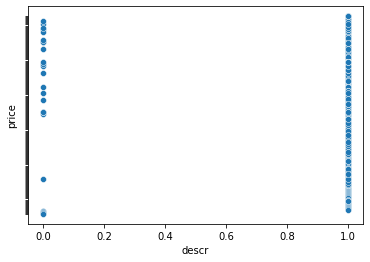

In [76]:
# Without description, the price raises. This doesn't make any sense, so we don't use it. Only 25 of the 923 records don't have a description.

withDescription = data[data['description'].isnull()==False]
withDescription['descr'] = 1
withoutDescription = data[data['description'].isnull()==True]
withoutDescription['descr'] = 0

descrip = pd.concat([withDescription, withoutDescription])

g = sns.scatterplot(x=descrip['descr'], y=descrip["price"])
g.set(yticklabels=[])  
plt.show()


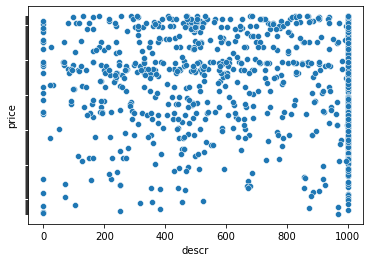

In [77]:
from sklearn.preprocessing import StandardScaler

# Some listings don't have a description, others are more ellaborate. We investigated the possibility of a correlation between the length
# of a description and the price of a listing. 
# We found out that there wasn't one.

descrLength = data
descrLength['descr'] = descrLength['description'].str.len()
descrLength['descr'] = descrLength['descr'].replace(np.nan, 0)
descrLength


g = sns.scatterplot(x=descrLength['descr'], y=descrLength["price"])
g.set(yticklabels=[])  
plt.show()


In [78]:
import ast

# We looked at the unique amenities that listings have to offer to see if there are possibilities of correlations with the price.
# since there are a lot of amenities available we decided not to do anything with this.

amenity = []
for x in data_cleaned['amenities']:
    x = ast.literal_eval(x)
    for y in range(0, len(x)):
        if x[y] not in amenity:
            amenity.append(x[y])


# print(amenity)




In [79]:
# features = [
#     ['host_since'], 
#     ['host_location'],
#     ['host_is_superhost'],
#     ['host_listings_count'],
#     ['host_has_profile_pic'],
#     ['host_identity_verified'],
#     ['distance_to_center'],
#     ['accommodates'],
#     ['bathrooms'],
#     ['bedrooms'],
#     ['beds'],
#     ['availability_30'],
#     ['availability_60'],
#     ['availability_90'],
#     ['availability_365'],
#     ['number_of_reviews'],
#     ['number_of_reviews_ltm'],
#     ['number_of_reviews_l30d'],
#     ['review_scores_rating'],
#     ['review_scores_accuracy'],
#     ['review_scores_cleanliness'],
#     ['review_scores_checkin'],
#     ['review_scores_communication'],
#     ['review_scores_location'],
#     ['review_scores_value'],
#     ['room_type_entire'],
#     ['room_type_hotel'],
#     ['room_type_private'],
#     ['room_type_shared'],
#     ['instant_bookable']
# ]


# for col in features:
#     print(col, " ", data_cleaned[col].dtypes, "\n")


In [80]:
# Features investigated in our model

features = [
    'host_since', 
    # 'host_location',
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'distance_to_center',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'instant_bookable'
]

In [81]:
# We drop all the columns that we won't use
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'distance_to_center',
       'room_type_entire', 'room_type_hotel', 'room_type_private',
       'room_type_shared'],
      dtype='object')

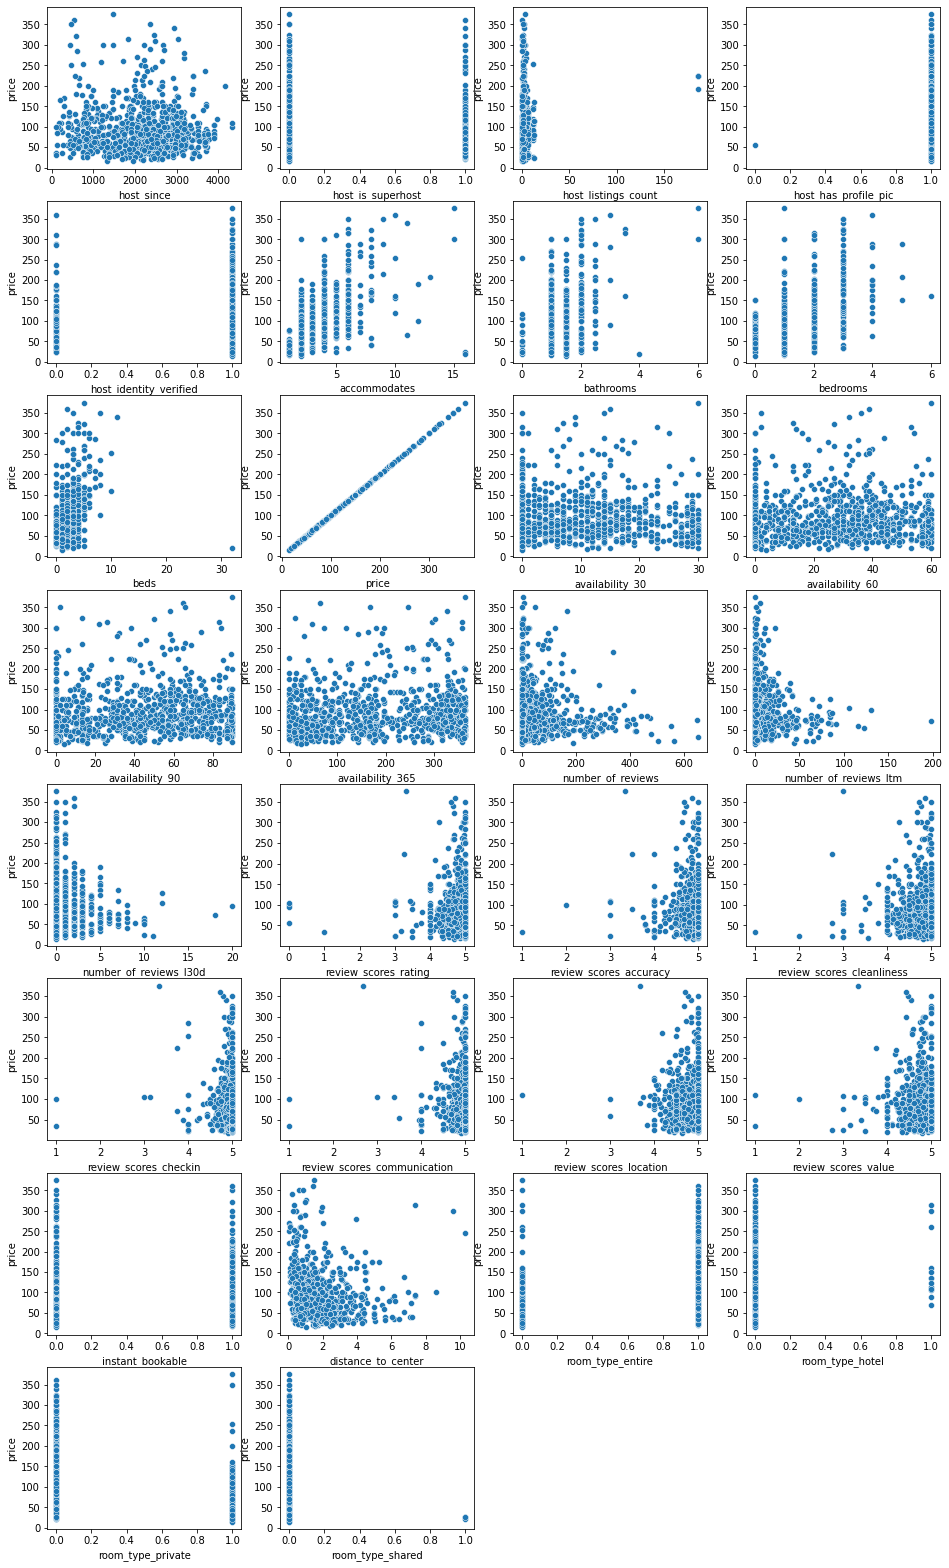

In [82]:
# Plots of the correlations betwee feature values and the price of listings.

plt.figure(figsize=(16,28))
for i, k in enumerate(data_cleaned.keys()):
    plt.subplot(8, 4, 1+i)
    sns.scatterplot(x=data_cleaned[k], y=data_cleaned["price"])

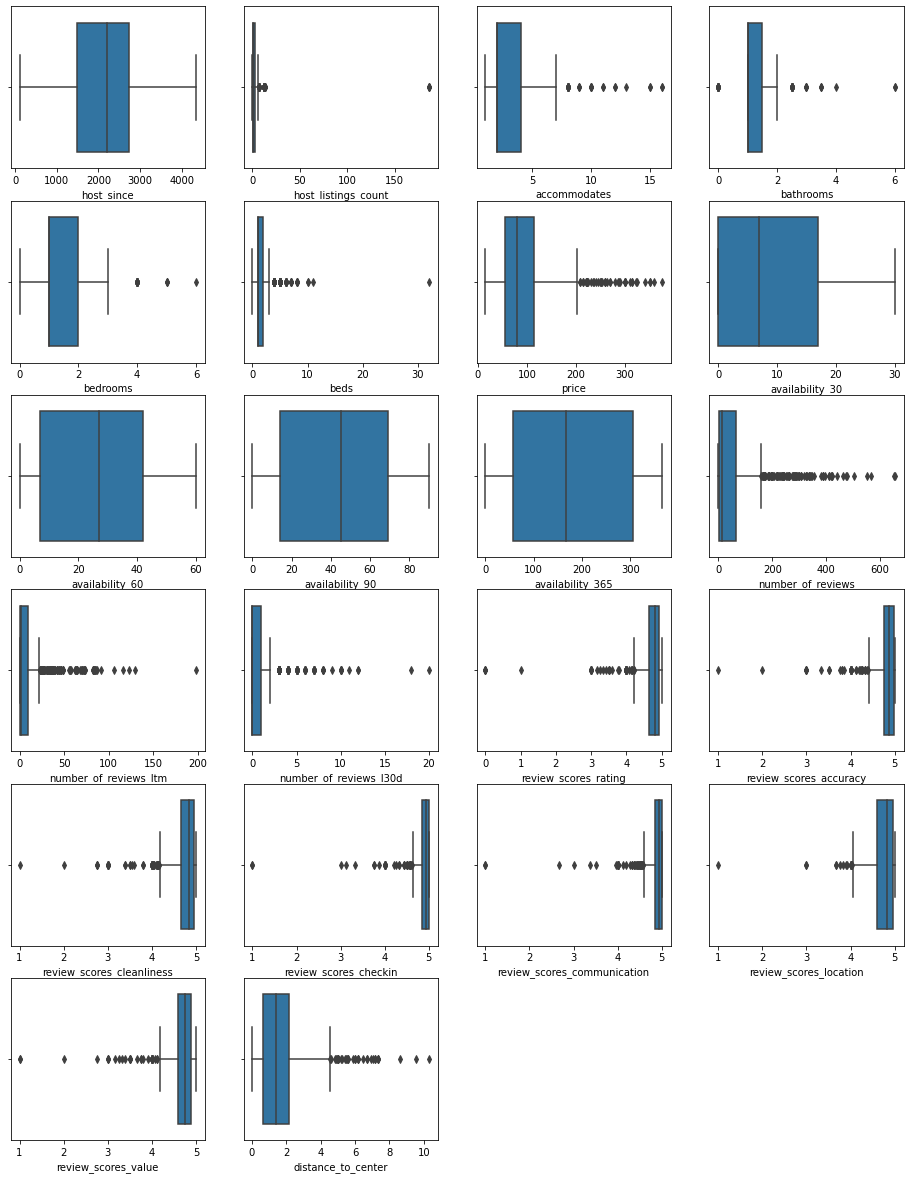

In [83]:
# Box plots of features to see if there are extreme outliers.

box = data_cleaned
box = box.drop(columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 
                    'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared'])

plt.figure(figsize=(16,28))
for i, k in enumerate(box.keys()):
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=box[k])




In the plots upwards we have multiple graphs with extreme outliers. Especially host_listings_counts and beds.
In the graph of the column 'accommodates', which we have shown once more in the cell below, there are multiple outliers that we have chosen to discard.
Aforementioned rows were discarded because we felt that an AirBNB that accommodates more than 8 people is very unique. It makes sense that those accomodations accompany a higher price range than smaller listings meant for a family or a small group of friends.

<AxesSubplot:xlabel='price'>

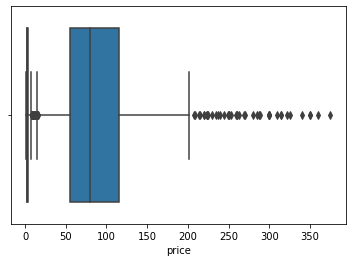

In [84]:
sns.boxplot(x=box['accommodates'])

sns.boxplot(x=box['price'])


In [85]:
# Removing the items with extreme outliers

data_cleaned = data_cleaned[data_cleaned['host_listings_count']<=50]
data_cleaned = data_cleaned[data_cleaned['beds']<=15]
data_cleaned = data_cleaned[data_cleaned['accommodates']<=7]

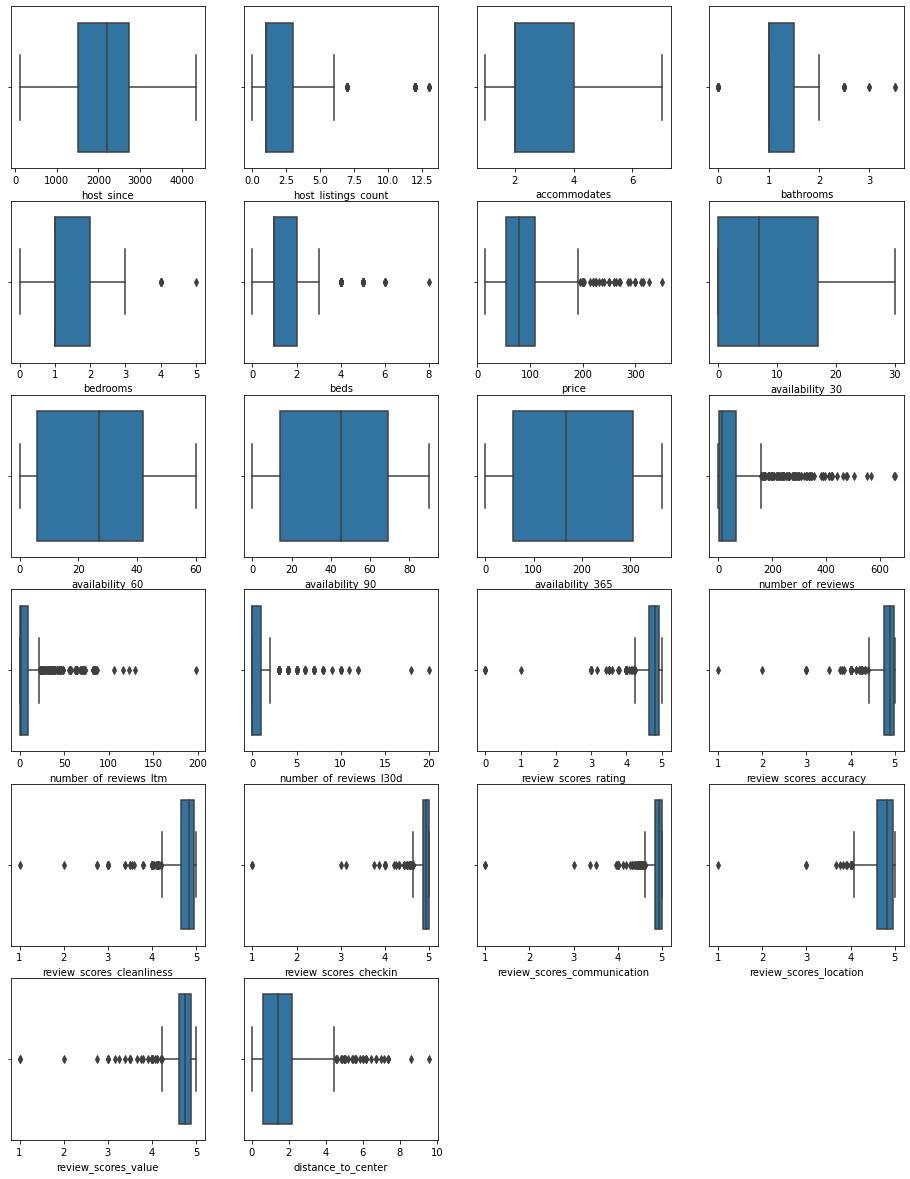

In [86]:
# Visual confirmation that the data of the features looks better without outliers.

box = data_cleaned
box = box.drop(columns=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 
                    'room_type_entire', 'room_type_hotel', 'room_type_private', 'room_type_shared'])

plt.figure(figsize=(16,28))
for i, k in enumerate(box.keys()):
    plt.subplot(8, 4, 1+i)
    sns.boxplot(x=box[k])



<AxesSubplot:>

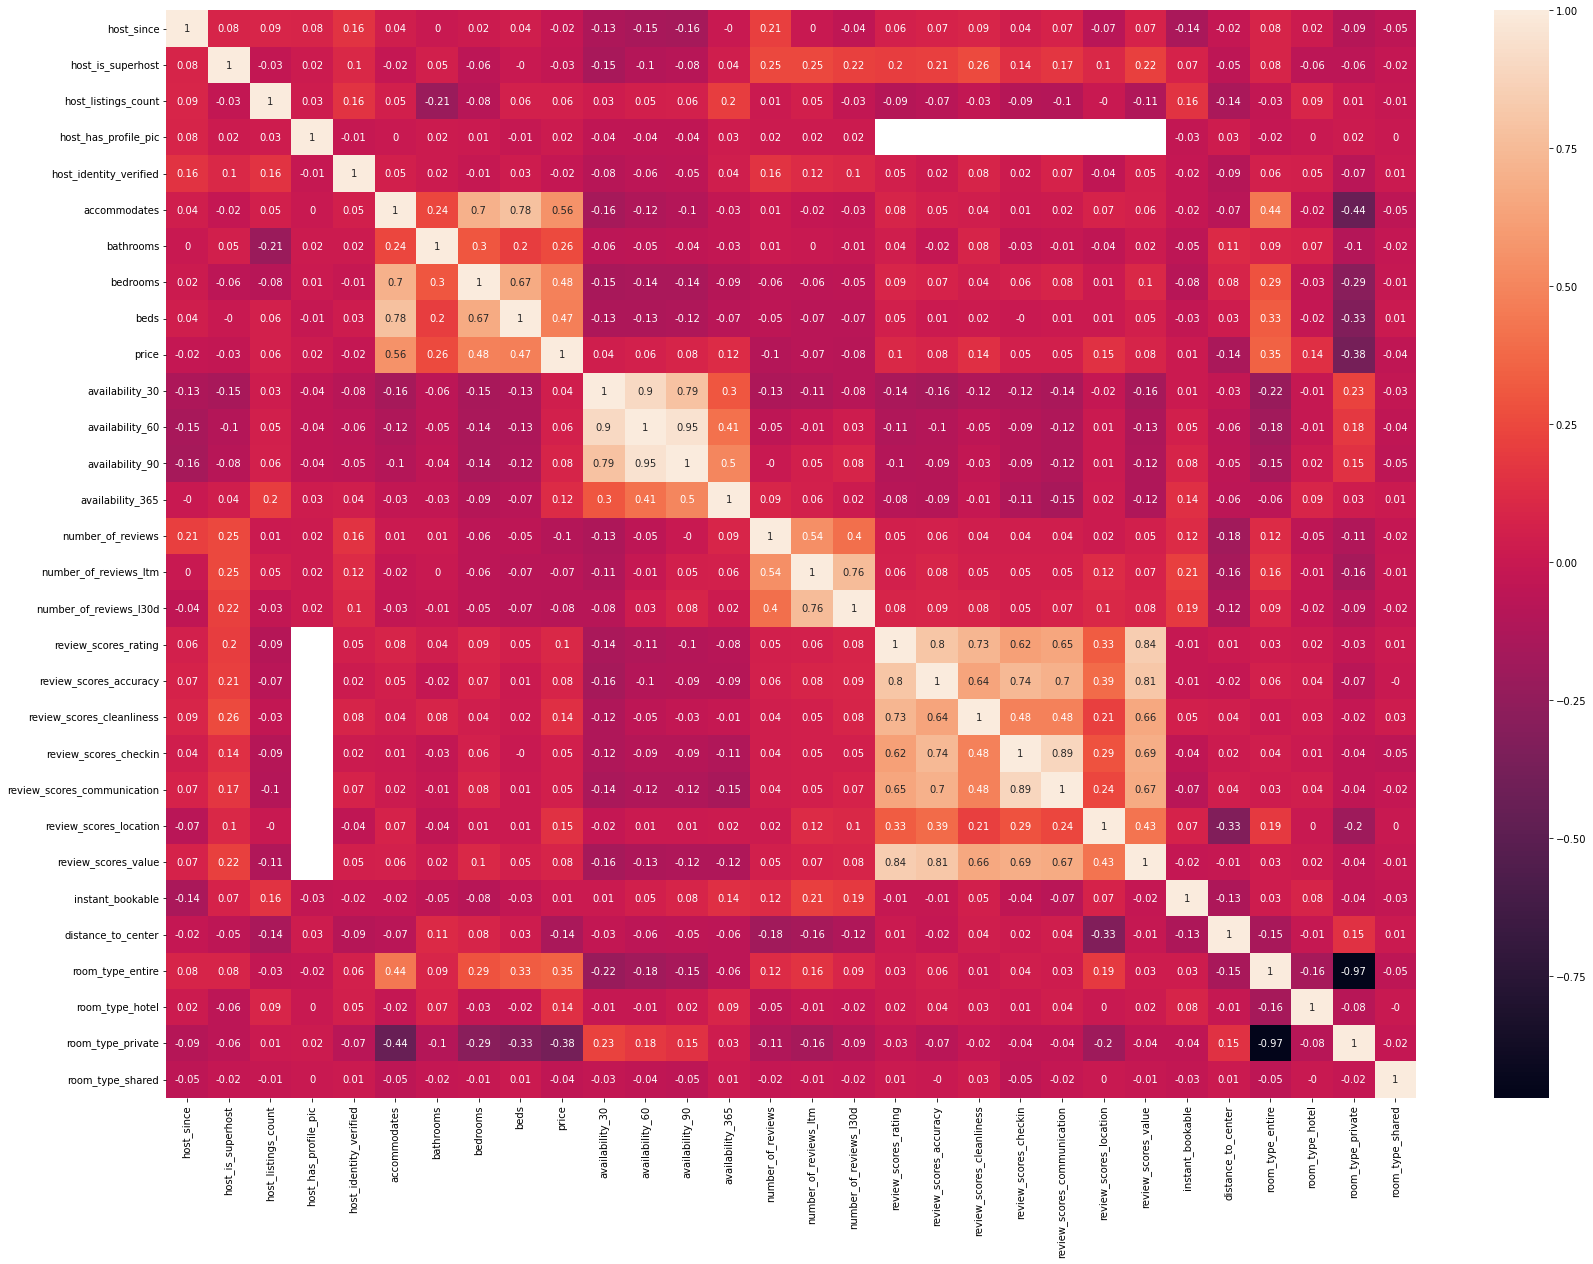

In [87]:
# Correlation matrix of chosen features.

correlation_matrix = data_cleaned.corr().round(2)
plt.figure(figsize=(28,20))
sns.heatmap(data=correlation_matrix, annot=True)

This correlationmatrix gives us an indication of which factors have a correlation with the price. A positive correlation close to 1 means that the price behaves more or less directly proportional to that factor (the closer the correlation is to 1, the more this is true). A negative correlation close to -1 means the price will behave more or less inversly proportional to that factor (once again, a correlation closer to -1 means the price will behave more inversly proportional to that factor).

We will now make a decision tree based on these features. The tree will automatically choose the best feature for each division.  

In order to find out which columns have the best linear trend in function of the price we used the Linear Regression from scikit-learn. We calculated the Root Mean Squared Error (RMSE) of every column in our features and sorted the dictionary based on the values. The best linear trends are orderd from top to bottom.

In [88]:
# Linear regression
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
RMSE_dictionary = {}

X = data_cleaned.drop(['price'], axis=1)
Y = data_cleaned['price']


# We delete the review_scores because a lot of its values is not a number which means that we cannot use in our regression model
for feature in X.columns:
    if re.match("review_scores_*", feature):
        X = X.drop(feature, axis=1)


for i in X.columns:
    X2 = pd.concat([X[i]], axis=1)

    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X2, Y, test_size=0.2)


    lin_model.fit(X_train, Y_train)

    # model evaluation for training set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    RMSE_dictionary[i] = rmse
    

RMSE_sorted = sorted(RMSE_dictionary.values())
sorted_dictionary = {}

for i in RMSE_sorted:
    for k in RMSE_dictionary.keys():
        if(RMSE_dictionary[k] == i):
            sorted_dictionary[k] = RMSE_dictionary[k]
            break

for i in sorted_dictionary.keys():
    print(i, "\t", sorted_dictionary[i])



host_is_superhost 	 38.480372276017334
accommodates 	 40.28020741402542
host_listings_count 	 41.85906690123172
availability_60 	 43.27925654130848
number_of_reviews_ltm 	 44.00555192292515
room_type_private 	 45.74742978034847
distance_to_center 	 46.26757987150283
instant_bookable 	 46.30238222617703
availability_365 	 46.367156498895824
room_type_shared 	 46.423389608360175
room_type_hotel 	 47.31646900800048
bedrooms 	 47.8173894938162
availability_30 	 48.963770028562344
beds 	 50.63970118177678
number_of_reviews 	 51.091790581825904
availability_90 	 51.24900602121569
room_type_entire 	 51.79495547654295
host_has_profile_pic 	 52.11690580903016
bathrooms 	 52.94150620404142
number_of_reviews_l30d 	 53.376034395008276
host_identity_verified 	 53.42487269803595
host_since 	 55.57101359786614


In [89]:
# First we need to divide our data in a train- and testset
import sklearn.model_selection as model_selection

X = data_cleaned.drop(['price'], axis=1)
Y = data_cleaned['price']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2)


In [90]:
import re

# We delete the review_scores because a lot of its values is not a number which means that we cannot use in our decision_tree

for feature in X_train.columns:
    if re.match("review_scores_*", feature):
        X_train = X_train.drop(feature, axis=1)
        X_test = X_test.drop(feature, axis=1)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

def visualize_results(predictions, ground_truth):
    
    plt.scatter(ground_truth, predictions, alpha=0.5)
    plt.xlabel("Ground truth price")
    plt.ylabel("Predicted price")
    plt.show()
    
    rmse = (np.sqrt(mean_squared_error(ground_truth, predictions)))
    r2 = r2_score(ground_truth, predictions)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [92]:
X_train.dtypes

host_since                  int32
host_is_superhost           int32
host_listings_count         int32
host_has_profile_pic        int32
host_identity_verified      int32
accommodates                int32
bathrooms                 float64
bedrooms                    int32
beds                        int32
availability_30             int32
availability_60             int32
availability_90             int32
availability_365            int32
number_of_reviews         float64
number_of_reviews_ltm       int32
number_of_reviews_l30d      int32
instant_bookable            int32
distance_to_center        float64
room_type_entire            uint8
room_type_hotel             uint8
room_type_private           uint8
room_type_shared            uint8
dtype: object

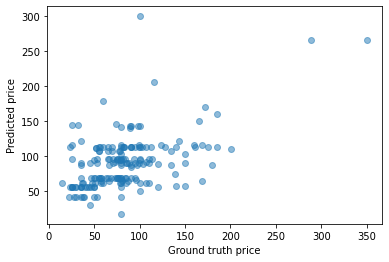

RMSE is 42.55094731781136
R2 score is 0.13275175896917124


In [93]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# DecisionTree from the scikit-learn with our cleaned_data


tree = DecisionTreeRegressor(max_depth=7)
tree = tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)

visualize_results(predictions, Y_test)

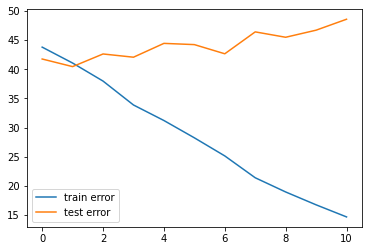

2 40.450318434930395


In [94]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

rmse_train = []
rmse_test = []

rmse_min = 1000
depth_min = 0

for depth in range(1, 12):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree = tree.fit(X_train, Y_train)
    
    predictions = tree.predict(X_train)
    rmse_train.append((np.sqrt(mean_squared_error(Y_train, predictions))))
    

    predictions = tree.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, predictions)))
    if rmse < rmse_min:
        depth_min = depth
        rmse_min = rmse
    rmse_test.append(rmse)
    
plt.plot(rmse_train, label="train error")
plt.plot(rmse_test, label="test error")
plt.legend()
plt.show()

model = DecisionTreeRegressor()
print(depth_min, rmse_min)

The plot above shows us that a tree with a depth higher than 6 isn't necessarily better. As you can see, a higher depth makes sure the train error decreases, but the test error stays quite the same, and even increases. This is because the model is overtrained, it gets used to the training data and shapes itself to much to that input. As a result, new data is difficult to work with. The code below shows an overview of the importance of each feature in our tree. As you can see, in our tree the accomodates of a listing is the most important factor for the price, followed by the number of bathrooms and the distance to the center of Ghent.

In [95]:
imp_feat=pd.Series(tree.feature_importances_,index=X_train.columns.tolist())
imp_feat.sort_values(ascending=False)

bedrooms                  0.277340
distance_to_center        0.161002
host_since                0.093939
accommodates              0.081048
room_type_private         0.048227
availability_90           0.046358
availability_365          0.044901
number_of_reviews_ltm     0.041686
availability_30           0.034749
availability_60           0.034327
room_type_hotel           0.034009
number_of_reviews         0.032796
host_listings_count       0.023606
bathrooms                 0.019766
beds                      0.007294
number_of_reviews_l30d    0.005788
room_type_entire          0.004054
host_is_superhost         0.003355
host_identity_verified    0.003168
instant_bookable          0.002587
host_has_profile_pic      0.000000
room_type_shared          0.000000
dtype: float64